In [262]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('2017_jun_final.csv')
df.head()

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,...,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одесса,до 200 человек,...,False,ниже среднего,"Desktop Applications,Веб-разработка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 и более лет,0.5,4500,500,Другой,до 10 человек,...,False,средний,"Desktop Applications,Веб-разработка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


In [263]:
df.shape

(8704, 25)

In [264]:
df.dtypes

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [265]:
%matplotlib inline

In [266]:
missing_percentage_per_column = (df.isnull().sum() / len(df)) * 100

print("Частка пропусків в кожній колонці, %:")
print(missing_percentage_per_column)

Частка пропусків в кожній колонці, %:
N                                    0.000000
Должность                            0.000000
Язык.программирования               44.232537
Специализация                       82.938879
Общий.опыт.работы                    0.000000
Опыт.работы.на.текущем.месте         0.000000
Зарплата.в.месяц                     0.000000
Изменение.зарплаты.за.12.месяцев     0.000000
Город                                0.000000
Размер.компании                      0.000000
Тип.компании                         0.000000
Пол                                  0.000000
Возраст                              0.000000
Образование                          0.000000
Университет                          4.113051
Еще.студент                          0.000000
Уровень.английского                  0.000000
Предметная.область                   2.562040
Дата.заполнения                      0.000000
User.Agent                           0.000000
exp                                  0.000

In [267]:
nan_columns = df.columns[df.isnull().any()].tolist()
print(nan_columns)
df.drop(nan_columns[1:], axis=1, inplace=True)

['Язык.программирования', 'Специализация', 'Университет', 'Предметная.область', 'Валюта', 'cls']


In [268]:
missing_percentage_per_column = (df.isnull().sum() / len(df)) * 100

print("Частка пропусків в кожній колонці, %:")
print(missing_percentage_per_column)

Частка пропусків в кожній колонці, %:
N                                    0.000000
Должность                            0.000000
Язык.программирования               44.232537
Общий.опыт.работы                    0.000000
Опыт.работы.на.текущем.месте         0.000000
Зарплата.в.месяц                     0.000000
Изменение.зарплаты.за.12.месяцев     0.000000
Город                                0.000000
Размер.компании                      0.000000
Тип.компании                         0.000000
Пол                                  0.000000
Возраст                              0.000000
Образование                          0.000000
Еще.студент                          0.000000
Уровень.английского                  0.000000
Дата.заполнения                      0.000000
User.Agent                           0.000000
exp                                  0.000000
current_job_exp                      0.000000
salary                               0.000000
dtype: float64


In [269]:
df.dropna(inplace=True)


In [270]:
df.shape


(4854, 20)

In [271]:
# замінюємо досвід роботи на числові значення для можливості побудови кореляцій
experience_mapping = {
    'меньше 3 месяцев': 0.15,
    '0.25': 0.25,
    '0.5': 0.5,
    '1': 1,
    '1.5': 1.5,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5,
    '6': 6,
    '7': 7,
    '8': 8,
    '9': 9,
    '10 и более лет': 10  # Припустимо, що це середнє значення для "10 і більше років"
}
df['Общий.опыт.работы'] = df['Общий.опыт.работы'].map(experience_mapping)
df['Опыт.работы.на.текущем.месте'] = df['Опыт.работы.на.текущем.месте'].map(experience_mapping)


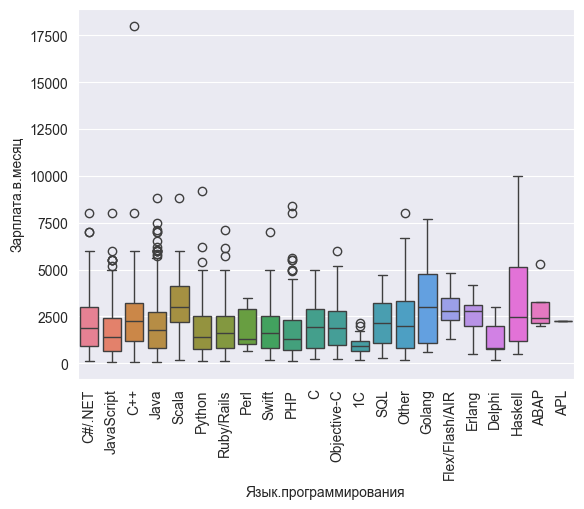

In [221]:

sns.boxplot(x='Язык.программирования', y='Зарплата.в.месяц', hue='Язык.программирования', data=df)
plt.xticks(rotation=90)
plt.show()

Язык.программирования
Java              1049
JavaScript        1023
C#/.NET            832
PHP                801
C++                216
Python             207
Swift              161
Ruby/Rails         154
Objective-C         93
C                   54
SQL                 54
Other               53
Scala               51
1С                  42
Golang              21
Delphi              17
Perl                 7
Flex/Flash/AIR       5
Erlang               5
Haskell              4
ABAP                 4
APL                  1
Name: count, dtype: int64
210


C:\Users\Anton\AppData\Local\Temp\ipykernel_8152\3539269150.py:6: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  count_wo_small[11] = others


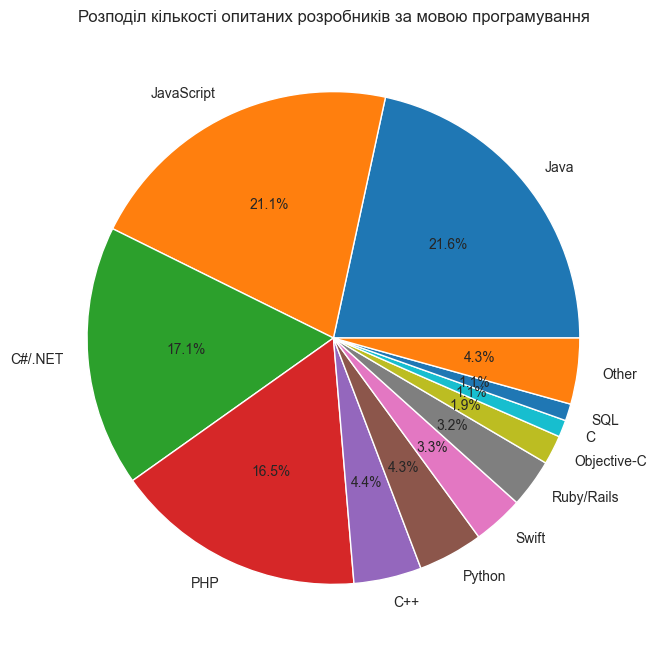

In [290]:
language_counts = df['Язык.программирования'].value_counts()
print(language_counts)
others = sum(language_counts[11:])
print(others)
count_wo_small = language_counts[0:12]
count_wo_small[11] = others
plt.figure(figsize=(8, 8))
plt.pie(count_wo_small, labels=count_wo_small.index, autopct='%1.1f%%')
plt.title('Розподіл кількості опитаних розробників за мовою програмування')
plt.show()

In [222]:
python_data = df[df['Язык.программирования'] == 'Python']

In [223]:
python_data.head()

,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary
12,13,Software Engineer,Python,1.0,0.15,800,200,Киев,до 50 человек,Аутсорсинговая,мужской,26,Высшее,False,ниже среднего,12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800
68,69,Software Engineer,Python,1.5,0.50,900,900,Киев,до 10 человек,Стартап,мужской,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.5,900
87,88,Junior Software Engineer,Python,0.5,0.50,600,0,Киев,до 10 человек,Аутсорсинговая,мужской,19,Незаконченное высшее,True,выше среднего,12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.5,600
114,115,Junior Software Engineer,Python,1.5,0.50,685,250,Киев,до 1000 человек,Аутсорсинговая,мужской,21,Незаконченное высшее,False,средний,12/06/2017 13:14:52,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.5,0.5,685
143,144,Junior Software Engineer,Python,1.0,1.00,750,250,Киев,до 10 человек,Аутсорсинговая,мужской,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:19:10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,1.0,750


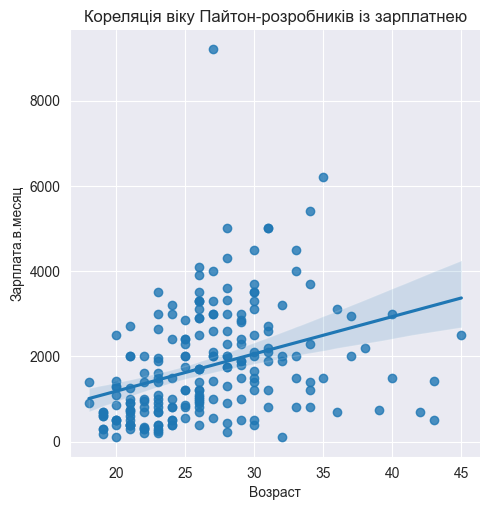

In [224]:
sns.lmplot(x='Возраст', y='Зарплата.в.месяц', data=python_data)
plt.title('Кореляція віку Пайтон-розробників із зарплатнею')
plt.show()

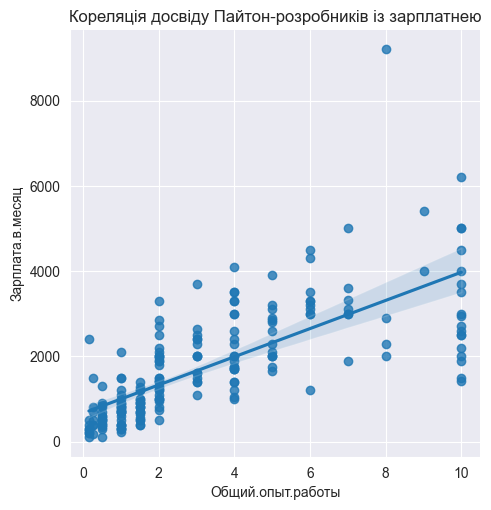

In [225]:
sns.lmplot(x='Общий.опыт.работы', y='Зарплата.в.месяц', data=python_data)
plt.title('Кореляція досвіду Пайтон-розробників із зарплатнею')
plt.show()

In [227]:
python_data.shape

(207, 20)

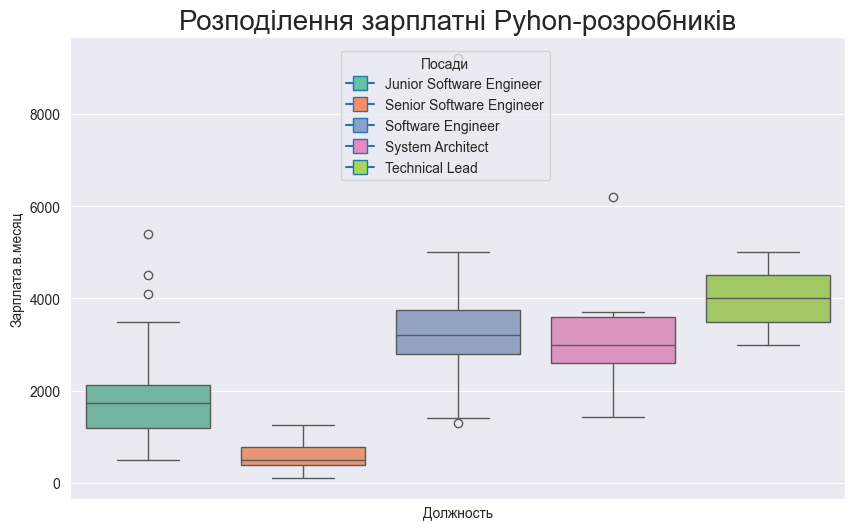

In [228]:

fig = plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Должность', y='Зарплата.в.месяц', data=python_data, hue="Должность", palette='Set2')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.title('Розподілення зарплатні Pyhon-розробників', fontsize=20)
unique_categories = np.unique(python_data['Должность'])
legend_handles = [plt.Line2D([0], [0], marker='s', markerfacecolor=sns.color_palette('Set2')[i], markersize=10) for i in range(len(unique_categories))]
fig.legend(legend_handles, unique_categories, title='Посади', loc='center', bbox_to_anchor=(0.5, 0.75))
plt.show()

In [229]:
pivot = python_data.groupby(['Должность'])['Зарплата.в.месяц'].agg(['min', 'max'])

In [230]:
def fill_avg_salary(salary):
    return salary.mean()

In [231]:
pivot['avg'] = pivot.apply(fill_avg_salary, axis=1)
print(pivot)



                           min   max     avg
Должность                                   
Junior Software Engineer   100  1250   675.0
Senior Software Engineer  1300  9200  5250.0
Software Engineer          500  5400  2950.0
System Architect          3000  5000  4000.0
Technical Lead            1425  6200  3812.5


In [232]:
new_pivot_table = pivot['avg'].describe()

In [233]:
print(new_pivot_table)

count       5.000000
mean     3337.500000
std      1700.091909
min       675.000000
25%      2950.000000
50%      3812.500000
75%      4000.000000
max      5250.000000
Name: avg, dtype: float64


In [234]:
new_pivot_table.to_csv('python_salaries_2017.csv')

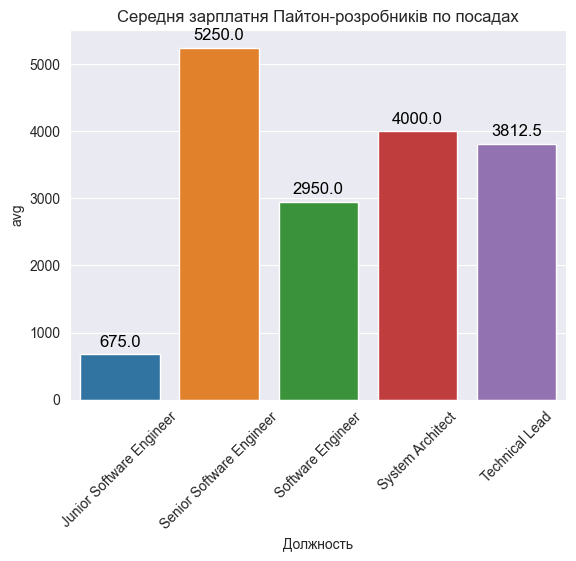

In [235]:
sns.set_style("darkgrid")
salaries = sns.barplot(x='Должность', y='avg', data=pivot, hue='Должность')
for p in salaries.patches:
    salaries.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 9), textcoords='offset points')
plt.title('Середня зарплатня Пайтон-розробників по посадах')
plt.xticks(rotation=45)
plt.show()